# Data_Scaling_and_Normalization 

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

# Preprocessing


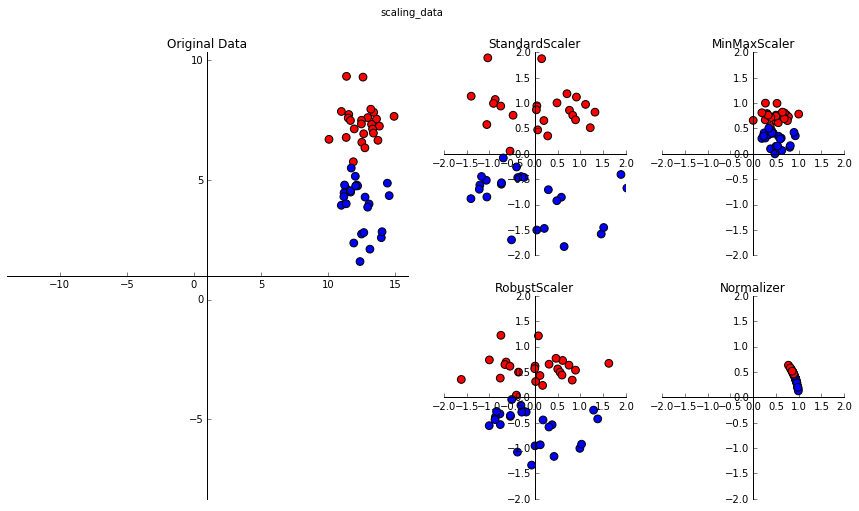

In [2]:
mglearn.plots.plot_scaling()
plt.suptitle("scaling_data");

### Applying data transformations

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# transform data
X_train_scaled = scaler.transform(X_train)
# print data set properties before and after scaling
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [   6.98    9.71   43.79  143.5     0.05    0.02    0.      0.      0.11
    0.05    0.12    0.36    0.76    6.8     0.      0.      0.      0.
    0.01    0.      7.93   12.02   50.41  185.2     0.07    0.03    0.
    0.      0.16    0.06]
per-feature maximum before scaling:
 [   28.11    39.28   188.5   2501.       0.16     0.29     0.43     0.2
     0.3      0.1      2.87     4.88    21.98   542.2      0.03     0.14
     0.4      0.05     0.06     0.03    36.04    49.54   251.2   4254.
     0.22     0.94     1.17     0.29     0.58     0.15]
per-feature minimum after scaling:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
per-feature maximum after scaling:
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))

per-feature minimum after scaling: [ 0.03  0.02  0.03  0.01  0.14  0.04  0.    0.    0.15 -0.01 -0.    0.01
  0.    0.    0.04  0.01  0.    0.   -0.03  0.01  0.03  0.06  0.02  0.01
  0.11  0.03  0.    0.   -0.   -0.  ]
per-feature maximum after scaling: [ 0.96  0.82  0.96  0.89  0.81  1.22  0.88  0.93  0.93  1.04  0.43  0.5
  0.44  0.28  0.49  0.74  0.77  0.63  1.34  0.39  0.9   0.79  0.85  0.74
  0.92  1.13  1.07  0.92  1.21  1.63]


### Scaling training and test data the same way

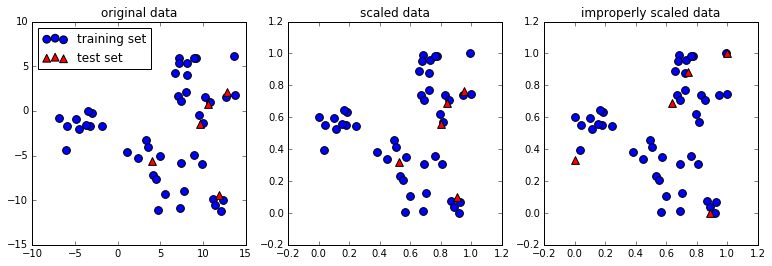

In [8]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test set
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test set
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[1].set_title("scaled data")

# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[2].set_title("improperly scaled data")

### The effect of preprocessing on supervised learning

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.629370629371


In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set

svm.score(X_test_scaled, y_test)

0.965034965034965

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)

0.95804195804195802

# Exercise
Load the dataset of housing prices in boston neighborhoods using ``sklearn.datasets.load_boston``.
This is a regression dataset for price prediction.
Apply a linear model to this regression task, with and without preprocessing.

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      